# Chapter 1
- Video lession: [video](https://www.youtube.com/watch?v=8SF_h3xF3cE), [notebook](https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data)
- Text lession: [book](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb)

Thoughts:
* Create image recognition for multiple animals (cat, dog, mouse, hamster) and see how it goes.

Much of what follows is based on the [notebook](https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data) used for the chapter 1 youtube video.  Streamlined and modified for the things I want to play with.  And to update code to remote warnings sometimes...

In [1]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")


In [2]:
!pip install -Uqq fastai duckduckgo_search

In [4]:
from duckduckgo_search import ddg_images
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(DDGS().images(term, max_results=max_images)).itemgot('image')

In [10]:
test_category="hamster"
urls = search_images(f"{test_category} photos", max_images=1)
urls[0]

Searching for 'hamster photos'


'https://www.rd.com/wp-content/uploads/2021/04/GettyImages-138524616-scaled.jpg'

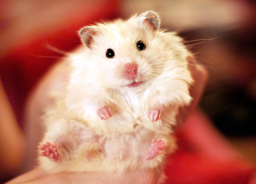

In [11]:
from fastdownload import download_url
dest = f"{test_category}.jpg"
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [21]:
from fastdownload import download_url

searches = 'dog','cat','hamster','mouse'

# download single sample image
for x in searches:
    urls = search_images(f"{x} photos", max_images=1)
    dest = f"{x}.jpg"
    download_url(urls[0], dest, show_progress=False)

Searching for 'dog photos'
Searching for 'cat photos'
Searching for 'hamster photos'
Searching for 'mouse photos'


In [12]:
path = Path('training_data')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'dog photo'
Searching for 'dog sun photo'
Searching for 'dog shade photo'
Searching for 'cat photo'
Searching for 'cat sun photo'
Searching for 'cat shade photo'
Searching for 'hamster photo'
Searching for 'hamster sun photo'
Searching for 'hamster shade photo'
Searching for 'mouse photo'
Searching for 'mouse sun photo'
Searching for 'mouse shade photo'


In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

/opt/app-root/lib64/python3.9/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


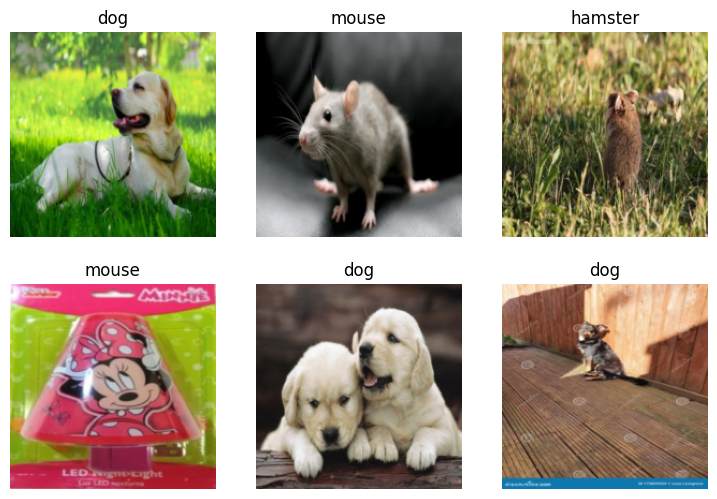

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.829348,0.420993,0.153846,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.696876,0.271308,0.092308,00:10
1,0.497596,0.208943,0.061538,00:10
2,0.343520,0.248015,0.076923,00:10
3,0.255112,0.269283,0.092308,00:10
4,0.200154,0.251285,0.092308,00:10
5,0.159566,0.253880,0.076923,00:10


In [18]:
category,category_num,probs = learn.predict(PILImage.create('dog.jpg'))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")

This is a: dog (1).
Probability it's a dog: 0.9999


In [22]:
category,category_num,probs = learn.predict(PILImage.create('cat.jpg'))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")

This is a: cat (0).
Probability it's a cat: 1.0000


In [23]:
category,category_num,probs = learn.predict(PILImage.create('hamster.jpg'))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")

This is a: hamster (2).
Probability it's a hamster: 0.9977


In [24]:
category,category_num,probs = learn.predict(PILImage.create('mouse.jpg'))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")

This is a: mouse (3).
Probability it's a mouse: 0.9960


In [25]:
# model was not trained on this data!  comes from chapter-1-bird.ipynb as a prereq, currious what would happen
category,category_num,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")

This is a: hamster (2).
Probability it's a hamster: 0.7673


In [26]:
# model was not trained on this data!  comes from chapter-1-bird.ipynb as a prereq, currious what would happen
category,category_num,probs = learn.predict(PILImage.create('forest.jpg'))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")

This is a: dog (1).
Probability it's a dog: 0.3999
